# Homework 7（11.12）

### 2023级 10222140402 吕欣萌

数据预处理
<ul><li>数据质量：缺失值处理、异常处理、重复数据</li><li>数据结构：格式转化、数据合并</li></ul>

1. 删除重复数据，并输出去重前后的数据量

In [1]:
import pandas as pd

# 读取原始数据
raw_data = pd.read_csv(r'C:\Users\86137\Desktop\github_bot_raw_data.csv') 

# 选择需要的列
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin', 
    'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username', 
    'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

# 去重前的数据量
print("去重前数据量:", len(data))

# 删除重复数据
data_dedup = data.drop_duplicates()

# 去重后的数据量
print("去重后数据量:", len(data_dedup))

去重前数据量: 20358
去重后数据量: 19779


2. 缺失值处理
<ul> <li>首先，去掉 gravatar_id 列，并查看各列的缺失值的情况</li><li>其次，将可转化成 boolean 变量的列字段转化成 boolean 变量，文本数据用空字符串填充空值......</li><li>最后，再次看各列有无缺失值</li></ul>

In [2]:
# 去掉 'gravatar_id' 列
data.drop(columns=['gravatar_id'], inplace=True, errors='ignore')

# 查看各列的缺失值情况
print("去掉 'gravatar_id' 列后，缺失值情况：")
print(data.isnull().sum())

# 将可转化为布尔类型的列转为布尔类型，填充空值为 False
bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    # 确保列数据为布尔类型后，再填充缺失值
    data[col] = data[col].astype('boolean').fillna(False)

# 填充文本类型列中的空值为空字符串
text_columns = [
    'label', 'login', 'node_id', 'avatar_url', 'url', 'html_url', 'followers_url', 
    'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 'organizations_url', 
    'repos_url', 'events_url', 'received_events_url', 'type', 'name', 'company', 
    'blog', 'location', 'email', 'bio', 'twitter_username'
]
data[text_columns] = data[text_columns].fillna('')

# 再次检查各列的缺失值情况
print("处理缺失值后，最终的缺失值情况：")
print(data.isnull().sum())


去掉 'gravatar_id' 列后，缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
处理缺

3. 数据变换，将created_at、updated_at转为时间戳

In [3]:
# 确保 'created_at' 和 'updated_at' 列是 datetime 类型
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')

# 转换为 Unix 时间戳（以秒为单位）
data['created_at_timestamp'] = data['created_at'].astype('int64') // 10**9  # 转为秒
data['updated_at_timestamp'] = data['updated_at'].astype('int64') // 10**9  # 转为秒

# 查看转换结果
print(data[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())

                 created_at  created_at_timestamp                updated_at  \
0 2011-09-26 17:27:03+00:00            1317058023 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00            1435572766 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00            1220026803 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00            1400611389 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00            1345126753 2023-10-06 11:58:41+00:00   

   updated_at_timestamp  
0            1697196070  
1            1696659974  
2            1696212681  
3            1697115299  
4            1696593521  


4. 数据可视化
<ul><li>4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）</li><li>4.2 可视化bot类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）</li><li>4.3 可视化human类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）</li><li>4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）</li><li>4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）</li></ul>

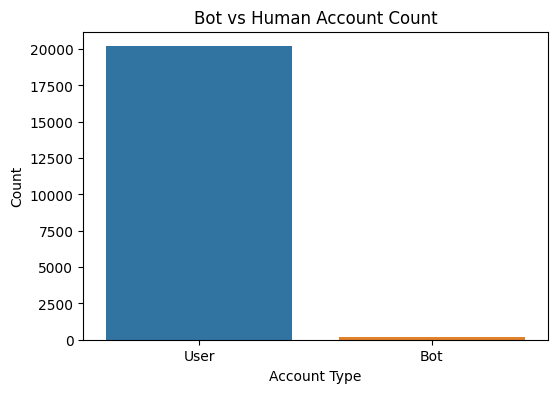

In [4]:
#4.1可视化bot和hunman类型的情况
import seaborn as sns
import matplotlib.pyplot as plt

# 统计 bot 和 human 类型的数量
type_counts = data['type'].value_counts()

# 绘制柱状图
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, legend=False)
plt.title('Bot vs Human Account Count')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()


**选择原因：**
<ul><li>柱状图:是非常直观的分类数据可视化方式，能够清晰地展示bot和human类型账号的数量差异。通过柱状图，可以快速识别数据中的主要趋势，例如是否某一类型的账号占据了主导地位。</li></ul>

**结果分析：**
<ul><li>从柱状图中，我们可以观察到bot和human类型账号的数量差异。如果某个类型的柱形特别高，说明该类型账号在数据中占比较大。</li><li>如果bot类型的账号数量远多于human类型，可能表明数据集包含了很多自动化账户。这种情况在社交平台、爬虫程序等场景中较为常见。</li><li>如果human类型账号数量更多，可能意味着该数据集更多地代表真实用户，适用于用户行为分析等。</li></ul>

**数据洞察：**
<ul><li>账号类型比例：如果bot类型的账号占比过高，可能反映出数据集中有大量的自动化行为，例如爬虫或者其他机器生成的账户。这样的数据可能需要进一步清洗或过滤。</li><li>人工账号的代表性：如果human类型账号占多数，说明该数据集可能更能代表真实用户行为。对于分析用户行为、兴趣等场景来说，human账号可能更具代表性。</li></ul>

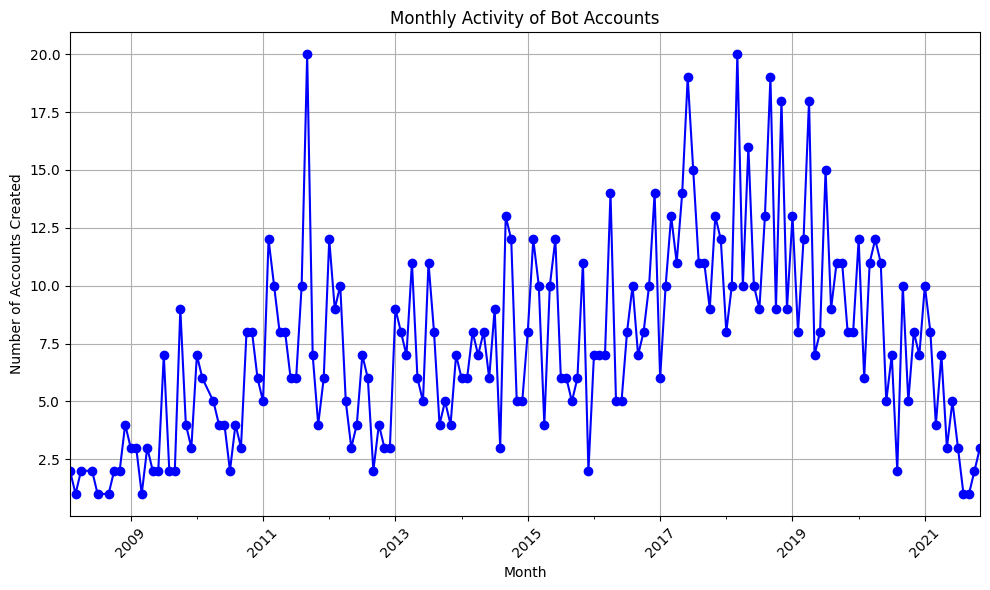

In [8]:
#4.2可视化bot类型账号的活跃情况
import pandas as pd
import matplotlib.pyplot as plt

# 筛选出 bot 类型账号
bot_data = data[data['label'] == 'Bot'].copy()  # 使用 .copy() 生成一个副本

# 将 'created_at' 转换为 datetime 格式
bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], errors='coerce')
bot_data['created_at'] = bot_data['created_at'].dt.tz_localize(None)  # 移除时区信息

# 提取 'created_at' 中的年份和月份，按月统计
bot_data['year_month'] = bot_data['created_at'].dt.to_period('M')

# 计算每月创建的 bot 类型账号数
monthly_activity = bot_data['year_month'].value_counts().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
monthly_activity.plot(kind='line', marker='o', color='b')
plt.title('Monthly Activity of Bot Accounts')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Created')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # 自动调整布局
plt.show()

**选择原因：**
<ul><li>折线图：可以清晰地展示bot账号在不同时间的活跃情况。通过这种图表，我们能直观地看到bot类型账号是否在某些特定时间点或时间段内表现出较高的活跃度。</li></ul>

**结果分析：**
<ul><li>活跃周期性：如果图表中出现了某些明显的波动或峰值，可能表明bot类型账号的活动与某些事件相关。比如，某些时段的增加可能是因为系统更新、活动推送或爬虫高峰期。</li><li>增长趋势：如果bot类型账号的数量逐年或逐月增长，可能反映出自动化操作在增多。这也可能与网络爬虫、自动化营销等行为有关。</li><li>活跃度分布：我们可以观察到是否有某些月份或时间段活跃度显著更高，这些信息对了解bot行为模式非常有帮助。</li></ul>

**数据洞察：**
<ul><li>活跃时段：如果bot账号的活跃时段在特定的月份或日期集中，我们可能会发现某些节假日或特定事件触发了大量的bot活动。例如，社交平台的热门话题或营销活动可能吸引了更多的爬虫和自动化账号。</li><li>持续增长：如果图表中显示bot类型账号数逐渐上升，可能意味着自动化行为正在增加，平台可能需要采取措施来识别和限制这类账号的影响。</li><li>季节性波动：如果活动有明显的季节性波动，可能表明bot活动与某些季节性事件或推广活动相关。这些信息可以帮助平台制定更有效的反欺诈或反爬虫策略。</li><ul>

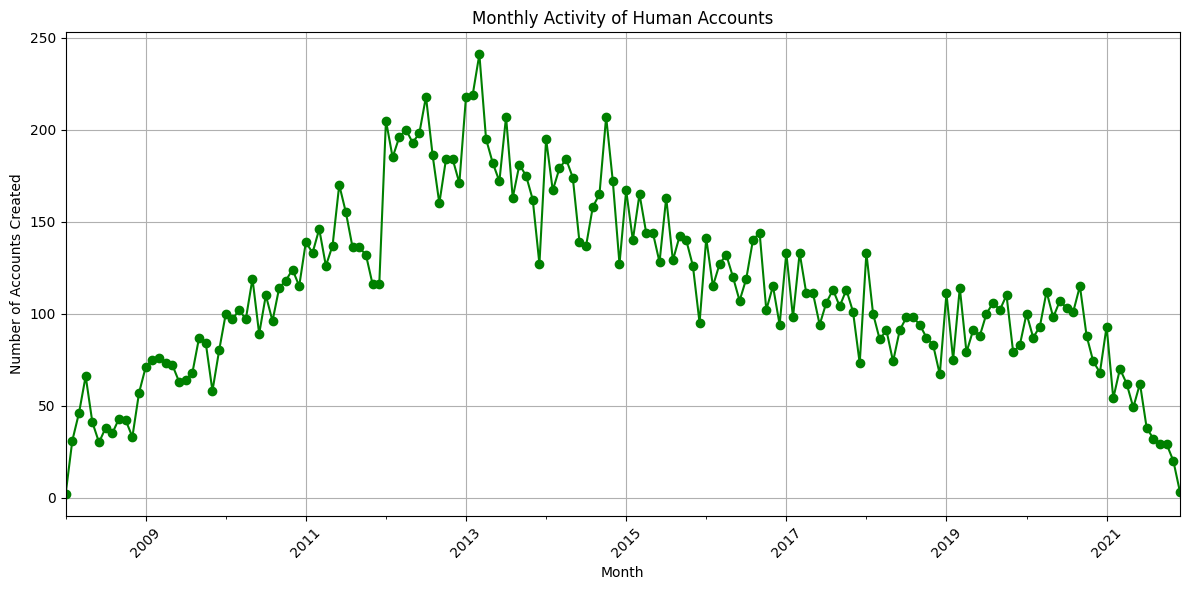

In [9]:
#4.3可视化human类型账号的活跃情况
import pandas as pd
import matplotlib.pyplot as plt

# 筛选出 'Human' 类型账号
human_data = data[data['label'] == 'Human'].copy()

# 将 'created_at' 转换为 datetime 格式并去掉时区信息
human_data['created_at'] = pd.to_datetime(human_data['created_at'], errors='coerce')
human_data['created_at'] = human_data['created_at'].dt.tz_localize(None)

# 提取 'created_at' 中的年份和月份
human_data['year_month'] = human_data['created_at'].dt.to_period('M')

# 计算每月创建的 human 类型账号数
monthly_activity_human = human_data['year_month'].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
monthly_activity_human.plot(kind='line', marker='o', color='g')
plt.title('Monthly Activity of Human Accounts')
plt.xlabel('Month')
plt.ylabel('Number of Accounts Created')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**选择原因：**
<ul><li>折线图：可以清晰地展示bot账号在不同时间的活跃情况。通过这种图表，我们能直观地看到bot类型账号是否在某些特定时间点或时间段内表现出较高的活跃度。</li></ul>

**结果分析：**
<ul><li>活跃周期：某些月份出现了较高的账号创建数量，这可能与某些特定事件或活动有关，如GitHub上的某些开源项目或技术大会。</li><li>用户增长趋势：如果数据的时间跨度较长，可以分析是否有持续的增长趋势，或者是否在某些月份中出现了用户创建数量的波动。</li><li>季节性波动：图中的波动也可能反映了季节性影响，例如假期或特定时间的促销活动。</li></ul>

**数据洞察：**
<ul><li>高峰期与低谷期：通过月度数据，可以识别出用户活跃的高峰期和低谷期。若某些月份的创建数量显著高于其他月份，可能说明在这段时间内有较多的用户加入。例如，假设每年某个特定月份（例如 GitHub的年会后）会看到更多注册用户。</li><li>周期性波动：通过可视化的图表，我们还可以观察到是否有周期性的波动，这可能与节假日、技术活动、开源项目发布周期等因素有关。周期性波动的识别对于评估平台的长期用户增长潜力非常重要。</li><li>潜在原因探索：如果出现用户创建数量异常的波动（如突然的下降或增加），我们可以进一步探讨其背后的原因。这可能与GitHub的外部环境、政策变更、用户行为变化等因素有关。</li><ul>

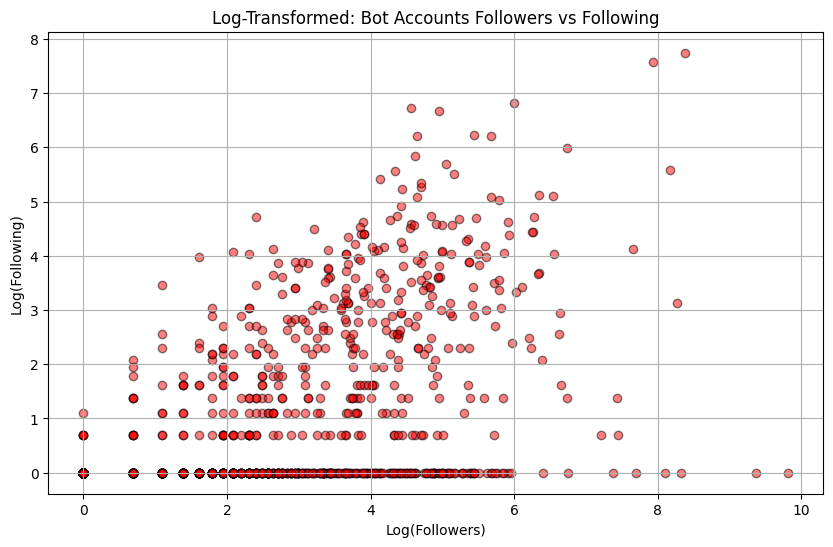

Bot类型账号数据概况：
          followers    following  log_followers  log_following
count   1218.000000  1218.000000    1218.000000    1218.000000
mean      95.636289    16.185550       2.296502       0.863752
std      688.556881   103.313454       1.930578       1.475690
min        0.000000     0.000000       0.000000       0.000000
25%        1.000000     0.000000       0.693147       0.000000
50%        7.000000     0.000000       2.079442       0.000000
75%       41.750000     3.000000       3.755317       1.386294
max    18292.000000  2310.000000       9.814274       7.745436


In [16]:
#4.4可视化bot类型账号的followers和following情况
import numpy as np
# 列字段解读
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 
    'subscriptions_url', 'organizations_url', 'repos_url', 'events_url', 
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog', 'location', 
    'email', 'hireable', 'bio', 'twitter_username', 'public_repos', 'public_gists', 
    'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

# 过滤Bot类型账号
bot_data = data[data['label'] == 'Bot'].copy()  # 确保是DataFrame的副本

# 对followers和following进行对数变换，避免极端值影响可视化
bot_data.loc[:, 'log_followers'] = np.log1p(bot_data['followers'])
bot_data.loc[:, 'log_following'] = np.log1p(bot_data['following'])

# 可视化：对数变换后的followers与following的散点图
plt.figure(figsize=(10, 6))
plt.scatter(bot_data['log_followers'], bot_data['log_following'], alpha=0.5, color='r', edgecolors='k')
plt.title('Log-Transformed: Bot Accounts Followers vs Following')
plt.xlabel('Log(Followers)')
plt.ylabel('Log(Following)')
plt.grid(True)
plt.show()

# 数据洞察
print("Bot类型账号数据概况：")
print(bot_data[['followers', 'following', 'log_followers', 'log_following']].describe())

**选择原因：**
<ul><li>避免极端值的影响：在原始数据中，followers和following可能会有非常大的数值，这些极端值会使得散点图的展示变得不均匀，难以观察到大多数数据的分布规律。对数变换将数据拉伸，减少这些极端值对图表的影响，使得数据更加可视化。</li><li>呈现数据的趋势：对数变换后，数据的增长趋势更加清晰，尤其对于指数级增长的情况，对数变换有助于显示更细致的变化。</li></ul>

**结果分析：**
<ul><li>数据分布：对数变换后的followers和following显示出更为紧凑的分布，极端大数值的影响被显著减少。大部分Bot类型账号的followers和following数量聚集在左下角，表明这些账号的关注者和被关注数目较低。</li><li>散点图形态：散点图显示了大多数Bot账号的followers和following之间的关系。大多数点集中在较低的数值区域，少部分点位于较高的数值区域，这些高值的点可能代表一些较为活跃的Bot类型账号。</li><li>关系分析：通过对数变换后的散点图，我们可以看到，虽然大多数Bot账号的followers和following数量较低，但也存在少部分账号其following和followers数量相对较高，表明某些 Bot 账号可能存在较为活跃的交互模式。</li></ul>

**数据洞察：**
<ul><li>Bot活跃程度：从图表中可以推测，大多数Bot账号的followers和following数量较低，这可能表明这些Bot账号的活跃度较低，关注的人数和被关注人数都相对有限。这可能是因为这些账号主要用于某些自动化任务，而非与其他用户进行互动。</li><li>少数高活跃度Bot账号：虽然大部分Bot账号的活跃度较低，但也存在少数高活跃度的Bot账号，这些账号可能在某些领域（例如，监控、数据抓取或内容发布）中扮演更重要的角色。它们的followers和following数量较大，说明它们可能会关注并被大量用户关注。</li><li>Bot类型账号的潜在利用价值：通过分析Bot类型账号的followers和following数据，可以进一步研究这些账号的行为模式。例如，高活跃度的Bot账号可能是自动化工具或服务的执行者，它们的行为可能会影响GitHub上某些项目的活动。因此，理解这些账号的分布情况有助于识别潜在的自动化活动。</li><ul>

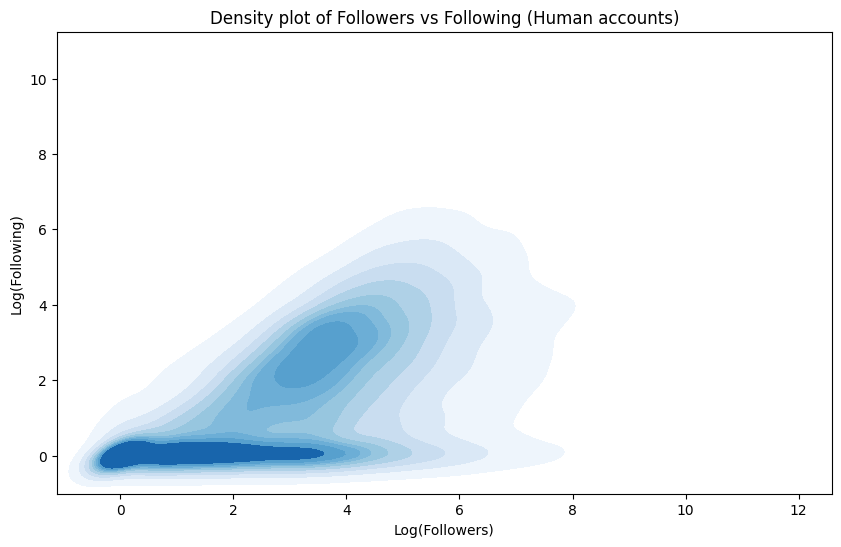

In [17]:
#4.5可视化human类型账号的followers和following情况
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 选择必要的列
data = raw_data[columns]

# 筛选出human类型的用户，并创建副本
human_data = data[data['label'] == 'Human'].copy()  # 使用 .copy() 确保是DataFrame的副本

# 使用loc修改DataFrame中的数据，避免警告
human_data['log_followers'] = np.log1p(human_data['followers'])
human_data['log_following'] = np.log1p(human_data['following'])

# 可视化：密度图（KDE plot）
plt.figure(figsize=(10, 6))
sns.kdeplot(data=human_data, x='log_followers', y='log_following', cmap='Blues', fill=True)
plt.title('Density plot of Followers vs Following (Human accounts)')
plt.xlabel('Log(Followers)')
plt.ylabel('Log(Following)')
plt.show()


**选择原因：**
<ul><li>数据预处理：在进行可视化之前，我们使用了对数变换(np.log1p()) 来处理followers和following两个字段。原始数据可能包含一些极端的值（例如，大量的追随者或关注者），这可能会使得可视化结果过于偏斜。通过对数变换，可以将数据范围压缩，减少极端值对结果的影响，更好地揭示数据的分布特征。</li><li>密度图：选择密度图是为了显示followers和following两个变量之间的联合分布，而不是单纯的散点图或直方图。密度图能够有效地揭示数据的集中区域、分布趋势以及相关性，特别是在数据量较大的情况下，可以避免散点图中过于密集或分散的点的影响。</li></ul>

**结果分析：**
<ul><li>集中区域：密度图的高密度区域通常表明有较多的用户聚集在这一范围。例如，followers和following都处于较小范围的区域可能代表了一些普通用户，他们的粉丝和关注者数量相对较少。</li><li>偏态分布：图中可能显示出某些密集区域向右偏移，说明部分用户具有显著更多的粉丝或关注者。这些通常是一些较为活跃的用户、开发者或意见领袖。</li><li>分布趋势：密度图的形状能够帮助我们理解followers和following之间的关系。如果两者有较强的正相关关系（即关注者多的用户也往往有更多的粉丝），我们可以在图中看到两者的分布区域较为重叠。否则，可能会看到两者之间的分布并不完全重叠，表明用户的关注行为与粉丝数量之间可能并不总是成正比。</li></ul>

**数据洞察：**
<ul><li>Bot活跃程度：从图表中可以推测，大多数Bot账号的followers和following数量较低，这可能表明这些Bot账号的活跃度较低，关注的人数和被关注人数都相对有限。这可能是因为这些账号主要用于某些自动化任务，而非与其他用户进行互动。</li><li>少数高活跃度Bot账号：虽然大部分Bot账号的活跃度较低，但也存在少数高活跃度的Bot账号，这些账号可能在某些领域（例如，监控、数据抓取或内容发布）中扮演更重要的角色。它们的followers和following数量较大，说明它们可能会关注并被大量用户关注。</li><li>Bot类型账号的潜在利用价值：通过分析Bot类型账号的followers和following数据，可以进一步研究这些账号的行为模式。例如，高活跃度的Bot账号可能是自动化工具或服务的执行者，它们的行为可能会影响GitHub上某些项目的活动。因此，理解这些账号的分布情况有助于识别潜在的自动化活动。</li><ul>